In [1]:
print("Happy machine learning!")

Happy machine learning!


In [1]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
data_dir = 'data'

In [4]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [5]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [6]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 688 files belonging to 2 classes.
Metal device set to: Apple M1


2022-08-07 15:39:25.421489: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-07 15:39:25.421656: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
data_iterator = data.as_numpy_iterator()

In [8]:
data_iterator

In [9]:
batch = data_iterator.next()

2022-08-07 15:39:35.271706: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [10]:
len(batch)

2

In [11]:
# Class 1 = Newts
# Class 0 = Lizards
batch[1]

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1], dtype=int32)

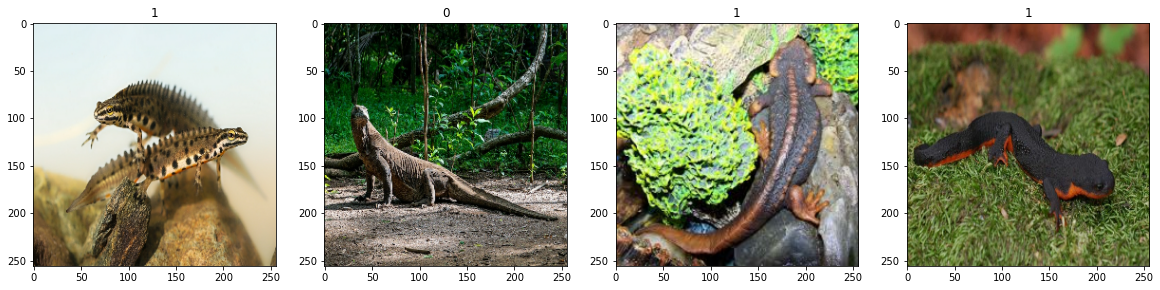

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [13]:
scaled = batch[0]/255

In [14]:
scaled.max()

1.0

In [15]:
data = data.map(lambda x,y: (x/255, y))

In [16]:
scaled_iterator = data.as_numpy_iterator()

In [17]:
batch = scaled_iterator.next()

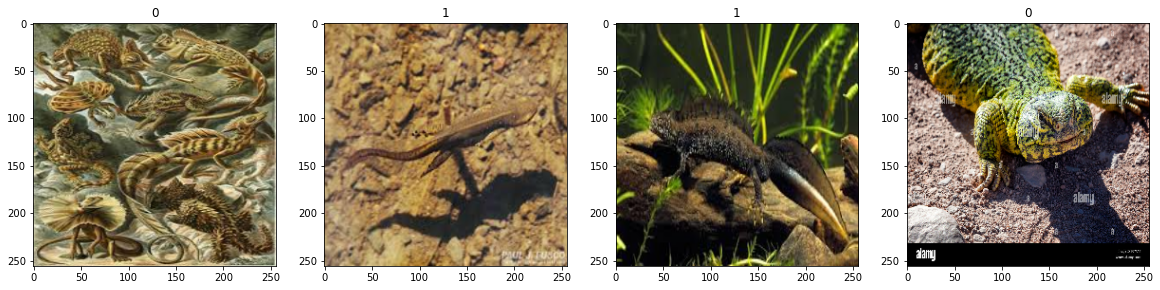

In [18]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [19]:
len(data)

22

In [20]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [21]:
train_size+val_size+test_size

22

In [23]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [26]:
len(test)

3

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [28]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [29]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [31]:
logdir='logs'

In [32]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [33]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2022-08-07 15:41:31.103095: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - ETA: 0s - loss: 0.8013 - accuracy: 0.5604

2022-08-07 15:41:33.945186: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 5s 259ms/step - loss: 0.8013 - accuracy: 0.5604 - val_loss: 0.6658 - val_accuracy: 0.6016
Epoch 2/20
15/15 [==============================] - 4s 248ms/step - loss: 0.6290 - accuracy: 0.6188 - val_loss: 0.5630 - val_accuracy: 0.6719
Epoch 3/20
15/15 [==============================] - 4s 249ms/step - loss: 0.6144 - accuracy: 0.6958 - val_loss: 0.6302 - val_accuracy: 0.6875
Epoch 4/20
15/15 [==============================] - 4s 245ms/step - loss: 0.5771 - accuracy: 0.7042 - val_loss: 0.5944 - val_accuracy: 0.6719
Epoch 5/20
15/15 [==============================] - 4s 245ms/step - loss: 0.4705 - accuracy: 0.8083 - val_loss: 0.4249 - val_accuracy: 0.8125
Epoch 6/20
15/15 [==============================] - 4s 246ms/step - loss: 0.4112 - accuracy: 0.8271 - val_loss: 0.3643 - val_accuracy: 0.8203
Epoch 7/20
15/15 [==============================] - 4s 247ms/step - loss: 0.2846 - accuracy: 0.8854 - val_loss: 0.2286 - val_accuracy: 0.9219
Epoch 8/20
15/15 

In [34]:
hist.history

{'loss': [0.8013218641281128,
  0.6290146112442017,
  0.6144003868103027,
  0.5770915150642395,
  0.4704990088939667,
  0.4111846685409546,
  0.28462734818458557,
  0.18696580827236176,
  0.15613259375095367,
  0.1794639378786087,
  0.10638881474733353,
  0.06473072618246078,
  0.03869548439979553,
  0.030416706576943398,
  0.06164046376943588,
  0.06224244832992554,
  0.051847293972969055,
  0.05408155545592308,
  0.0219526756554842,
  0.034202948212623596],
 'accuracy': [0.5604166984558105,
  0.6187500357627869,
  0.6958333849906921,
  0.7041667103767395,
  0.8083333969116211,
  0.8270833492279053,
  0.8854166865348816,
  0.9416667222976685,
  0.9458333849906921,
  0.9395833611488342,
  0.9750000238418579,
  0.9750000238418579,
  0.9895833730697632,
  0.9958333969116211,
  0.9875000715255737,
  0.9791667461395264,
  0.9854167103767395,
  0.9812500476837158,
  0.9979166984558105,
  0.9916667342185974],
 'val_loss': [0.6657702922821045,
  0.5630025267601013,
  0.6301896572113037,
  0.5

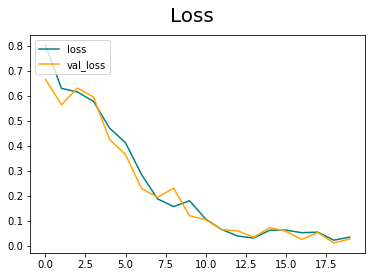

In [35]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

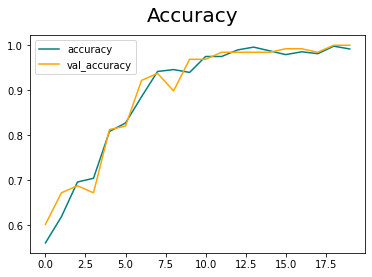

In [36]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [37]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [38]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [39]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 89ms/step


2022-08-07 15:43:25.001192: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 83ms/step


2022-08-07 15:43:25.343054: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [40]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


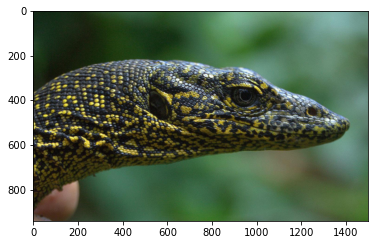

In [59]:
img = cv2.imread('varanus.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

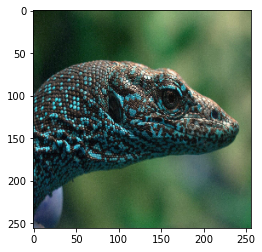

In [60]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [61]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 24ms/step


In [62]:
yhat

array([[0.00050241]], dtype=float32)

In [66]:
from tensorflow.keras.models import load_model

In [67]:
model.save(os.path.join('models', 'newtslizards.h5'))

In [68]:
new_model = load_model(os.path.join('models', 'newtslizards.h5'))

In [69]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 78ms/step


2022-08-07 15:52:19.014971: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [70]:
if yhatnew > 0.5:
    print(f'Predicted class is Newts')
else:
    print(f'Predicted class is Lizards')

Predicted class is Lizards
